# **导包**

In [33]:
# 导入必要的Python库
# pandas 是用于数据分析和处理的库，提供了 DataFrame 等数据结构
import pandas as pd
# numpy 是一个强大的数学库，用于处理数组数据和进行高级数学计算
import numpy as np
# matplotlib.pyplot 用于数据可视化，可以创建静态、动态、交互式的图表
import matplotlib.pyplot as plt
# seaborn 是基于matplotlib的统计图形库，提供了更高级的接口绘制统计图形
import seaborn as sns

# 从sklearn库导入模型选择与评估相关的模块
from sklearn.model_selection import train_test_split, GridSearchCV
# 数据预处理模块，用于特征缩放
from sklearn.preprocessing import StandardScaler
# 缺失值处理模块，用于填充缺失值
from sklearn.impute import SimpleImputer
# 模型型评估指标模块
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score, precision_score

# 分类模型导入
from sklearn.linear_model import LogisticRegression  # 逻辑回归分类器
from sklearn.neighbors import KNeighborsClassifier  # K近邻分类器
from sklearn.svm import SVC  # 支持向量机分类器
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from xgboost import XGBClassifier  # XGBoost分类器


import matplotlib.pyplot as plt
# 导入字体管理模块，用于支持中文显示
from matplotlib.font_manager import FontProperties

# **数据预处理**

In [34]:
# 设置matplotlib的中文字体以便正确显示中文标签与标题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体为SimHei（黑体），用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 设置以解决负号'-'显示为方块的问题

# 使用pandas的read_csv函数读取名为'patient.csv'的文件到DataFrame中
# 这个文件假设包含我们分析所需的患者数据
df = pd.read_csv('patient.csv')

# 输出数据集的前五行，让我们初步查看数据内容与结构
print("数据集的前五行：")
print(df.head()) 

数据集的前五行：
   Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90 

In [35]:
# 检查是否有缺失值
print("\n缺失值检查：")
print(df.isnull().sum())

# 数据预处理
# 处理缺失值前查看缺失值
print("填充缺失值前：")
print(df['Albumin_and_Globulin_Ratio'].isnull().sum())

# 处理缺失值
#创建一个 SimpleImputer 对象，并指定填充策略为均值（mean）。这意味着将使用该列的均值填充所有的缺失值。
imputer = SimpleImputer(strategy='mean')
df['Albumin_and_Globulin_Ratio'] = imputer.fit_transform(df[['Albumin_and_Globulin_Ratio']])

# 处理缺失值后查看缺失值
print("填充缺失值后：")
print(df['Albumin_and_Globulin_Ratio'].isnull().sum())


缺失值检查：
Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64
填充缺失值前：
4
填充缺失值后：
0


In [36]:
# 将分类变量 'Gender' 转换为数值编码
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
# 这行代码将性别列中的'Male'映射为1，'Female'映射为0，便于后续的模型输入。

# 定义特征变量 (X) 和 目标变量 (y)
X = df.drop(['Dataset'], axis=1)  
y = df['Dataset'].map({1: 1, 2: 0})  
# 这部分代码定义了特征集X为除'Dataset'列外的所有列，而目标变量y为'Dataset'列。其中'y通过映射，将1映射为1代表肝病，2映射为0代表非肝病，以适应二分类任务。

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# 使用train_test_split函数按比例(20%)随机划分数据集为训练集和测试集，random_state=42保证了随机分割结果的可复现性。

# 特征标准化
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  
# 特征标准化处理，使用StandardScaler对特征进行缩放，fit_transform根据训练集数据计算均值和标准差，transform训练集和测试集，
#使得每个特征的均值为0，方差为1，有助于某些模型更好地收敛和提高性能。

# **数据可视化**

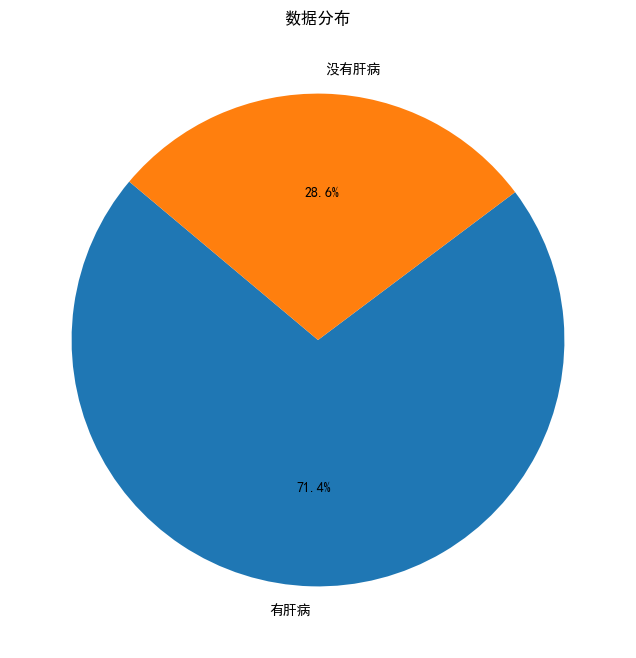

In [37]:
# 绘制 Dataset 的饼状图
dataset_counts = df['Dataset'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(dataset_counts, labels=['有肝病', '没有肝病'], autopct='%1.1f%%', startangle=140)
plt.title('数据分布')
plt.show()

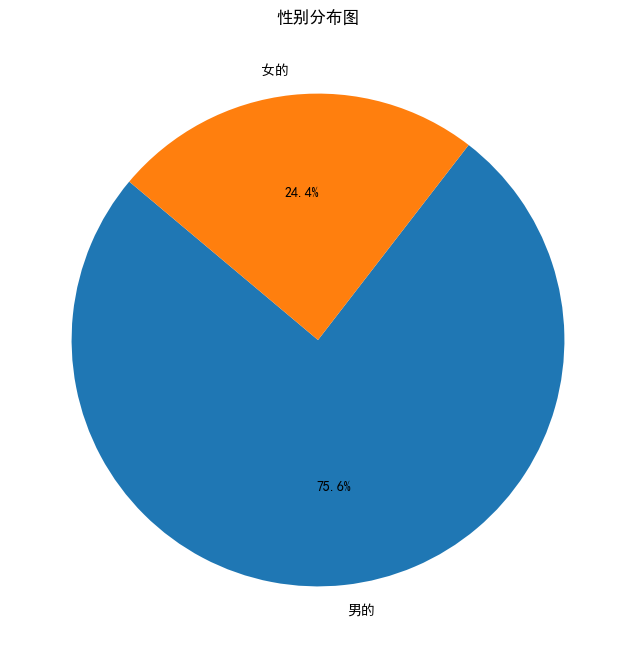

In [38]:
# 绘制 Gender 的饼状图
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['男的', '女的'], autopct='%1.1f%%', startangle=140)
plt.title('性别分布图')
plt.show()

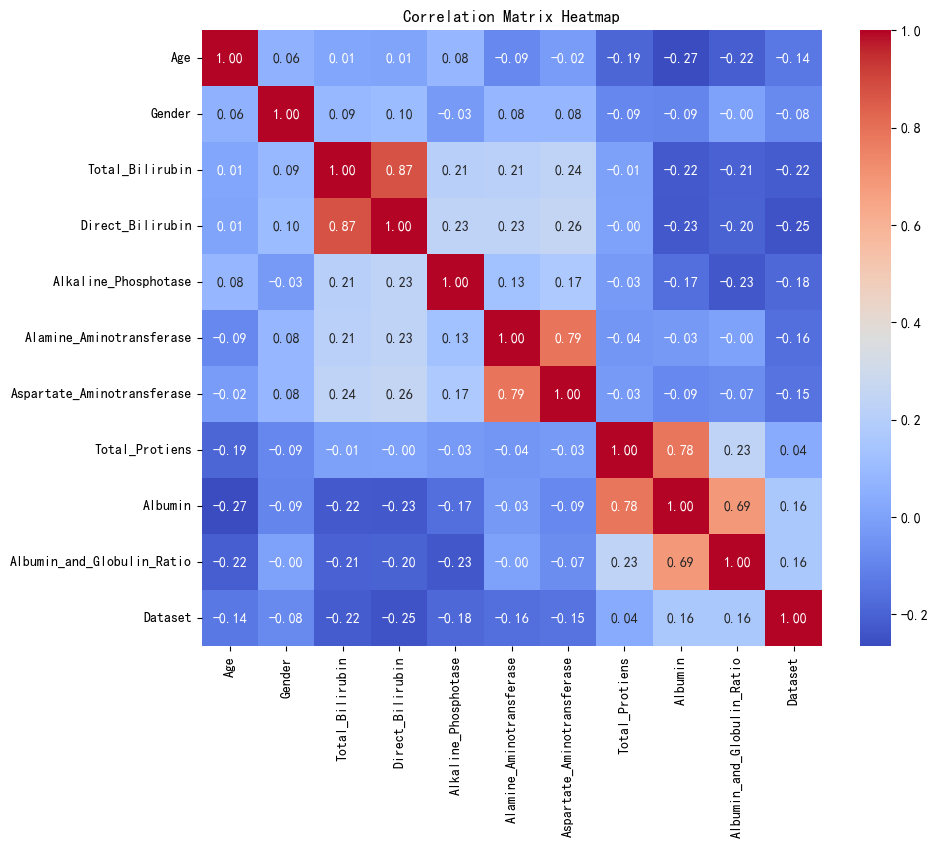

In [39]:
# 热力图
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

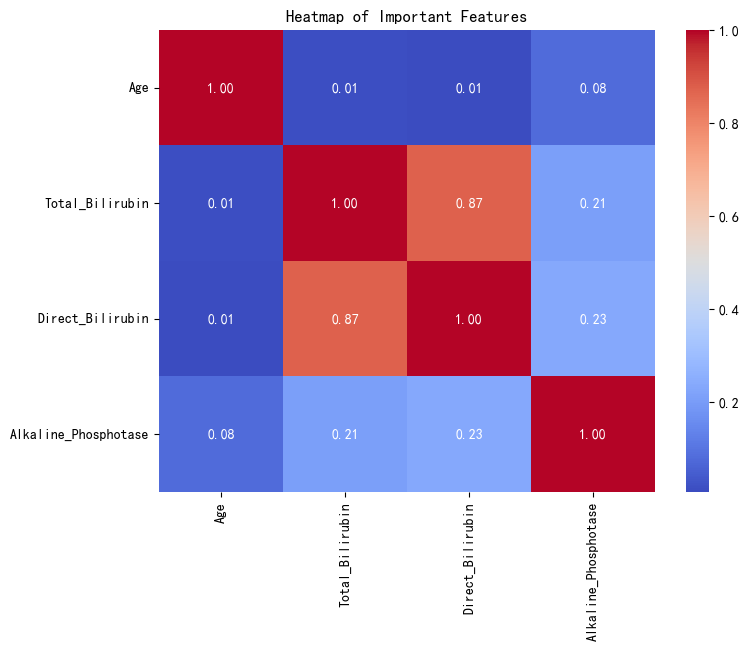

In [40]:
# 重要特征的详细热力图
important_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase']
plt.figure(figsize=(8, 6))
sns.heatmap(df[important_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Important Features')
plt.show()

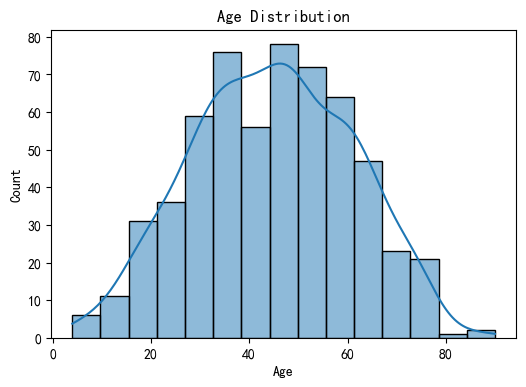

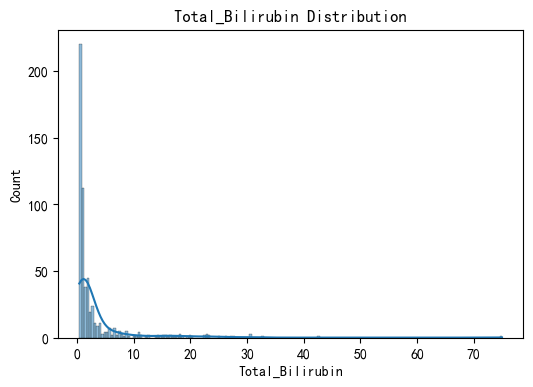

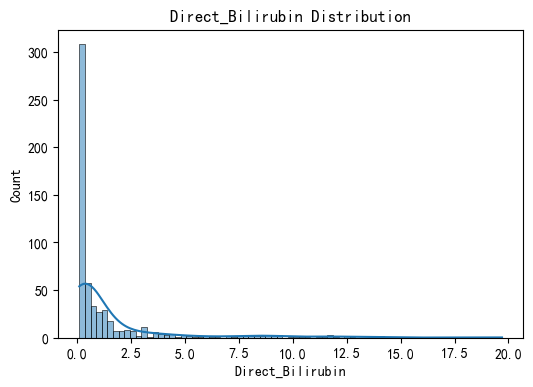

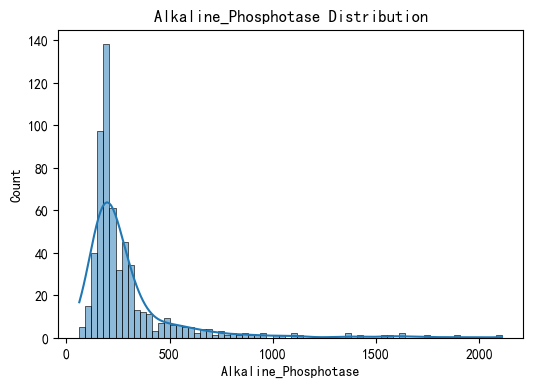

In [25]:
# 挑选重要特征并绘制饼状图、曲线图和分布图
important_features = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase']
for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()

# **构建模型**

In [41]:
# 构建模型
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [42]:
# 参数调优
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'n_estimators': [50, 100, 200]
    }
}

best_models = {}

In [43]:
# 对每个模型进行参数调优
#对每个模型进行参数调优 通过网格搜索（Grid Search）参数调优  创建一个GridSearchCV对象，该对象用于执行网格搜索以找到最佳的超参数组合
for model_name, model in models.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Support Vector Machine: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [44]:
# 模型评估
results = {}

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[model_name] = {
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'AUC': auc
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    if auc:
        print(f"AUC: {auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=1))
    print("\n")

Model: Logistic Regression
Accuracy: 0.7436
F1 Score: 0.8529
Precision: 0.7436
AUC: 0.7962
[[ 0 30]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.87      0.50      0.43       117
weighted avg       0.81      0.74      0.63       117



Model: K-Nearest Neighbors
Accuracy: 0.7009
F1 Score: 0.8023
Precision: 0.7889
AUC: 0.6989
[[11 19]
 [16 71]]
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        30
           1       0.79      0.82      0.80        87

    accuracy                           0.70       117
   macro avg       0.60      0.59      0.59       117
weighted avg       0.69      0.70      0.70       117



Model: Support Vector Machine
Accuracy: 0.7436
F1 Score: 0.8529
Precision: 0.7436
AUC: 0.7548
[[ 0 30]
 [ 0 87]]
         

In [45]:
# 比较结果
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                        Accuracy  F1 Score  Precision       AUC
Logistic Regression     0.743590  0.852941   0.743590  0.796169
K-Nearest Neighbors     0.700855  0.802260   0.788889  0.698851
Support Vector Machine  0.743590  0.852941   0.743590  0.754789
Random Forest           0.786325  0.858757   0.844444  0.808429
XGBoost                 0.743590  0.852941   0.743590  0.788123


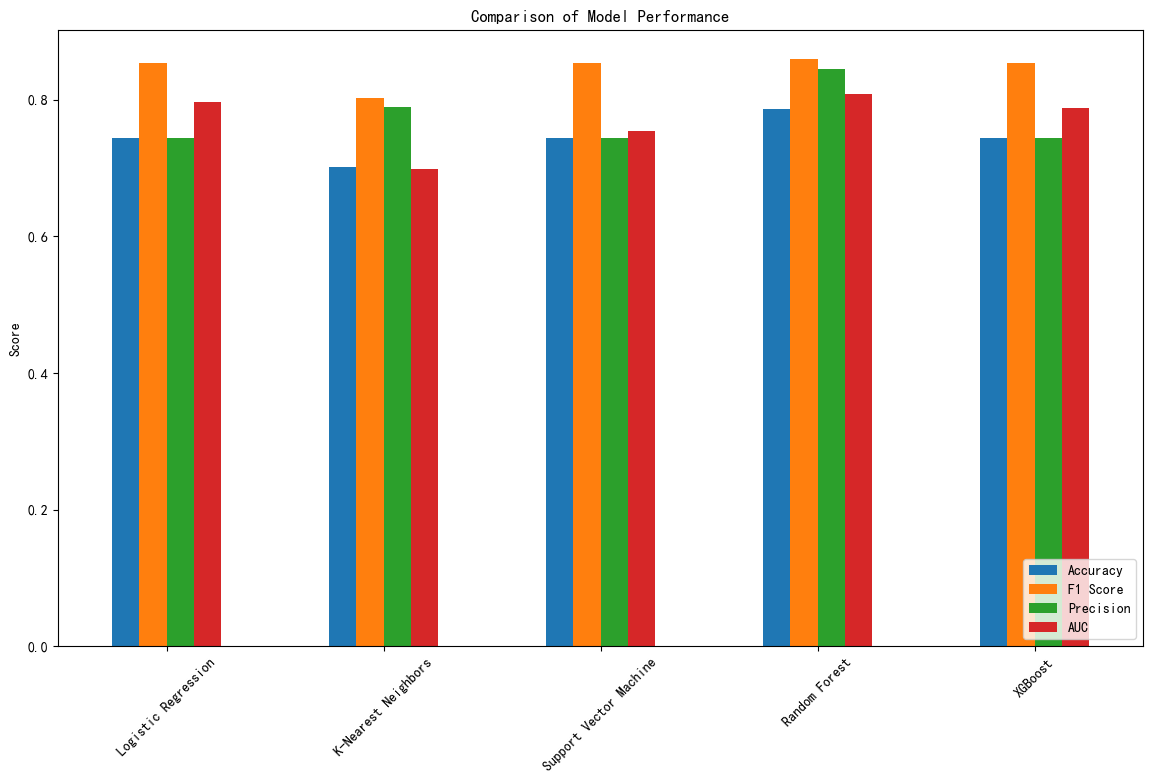

In [46]:
# 可视化模型性能比较
results_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()

In [47]:
# 比较结果
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

Model Evaluation Results:
                        Accuracy  F1 Score  Precision       AUC
Logistic Regression     0.743590  0.852941   0.743590  0.796169
K-Nearest Neighbors     0.700855  0.802260   0.788889  0.698851
Support Vector Machine  0.743590  0.852941   0.743590  0.754789
Random Forest           0.786325  0.858757   0.844444  0.808429
XGBoost                 0.743590  0.852941   0.743590  0.788123


In [48]:
#为了增加预测患肝癌的概率并探索与之相关的主要因素，我们首先需要从已有的模型中获取预测概率最高的患者患肝癌的可能性。
#以随机森林分类器为例，因为随机森林模型能够直接给出预测概率，
#我们将使用它来预测患肝癌的概率。然后，我们可以通过观察特征的重要性来确定哪些因素与患肝病的预测最相关
# 假设我们使用随机森林作为示例，因为它能直接给出预测概率
rf_model = best_models['Random Forest']

# 计算测试集上的预测概率
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 找出预测患肝癌概率最高的前10个病例（举例）
top_n = 10
high_risk_cases = y_pred_proba.argsort()[-top_n:][::-1]
high_risk_details = df.loc[df.index.isin(high_risk_cases), important_features]
print("预测患肝癌概率最高的病例特征：")
print(high_risk_details)

预测患肝癌概率最高的病例特征：
    Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase
2    62              7.3               4.1                   490
4    72              3.9               2.0                   195
15   25              0.6               0.1                   183
22   62              6.8               3.0                   542
30   57              4.0               1.9                   190
35   30              1.3               0.4                   482
42   42              6.8               3.2                   630
49   55             18.4               8.8                   206
63   57              0.7               0.2                   208
67   37              1.8               0.8                   215


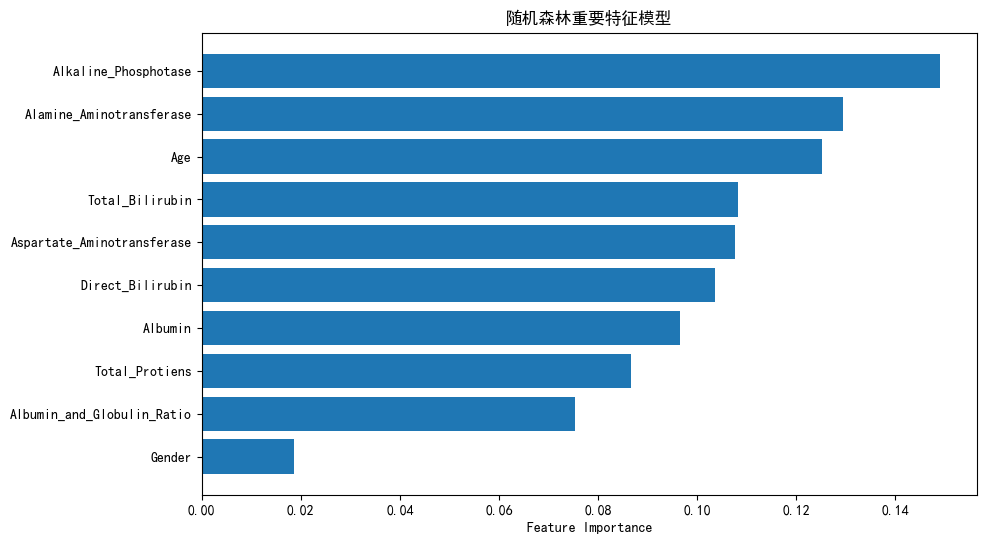

In [49]:
rf_feature_importance = rf_model.feature_importances_
sorted_idx = rf_feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), rf_feature_importance[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("随机森林重要特征模型")
plt.show()

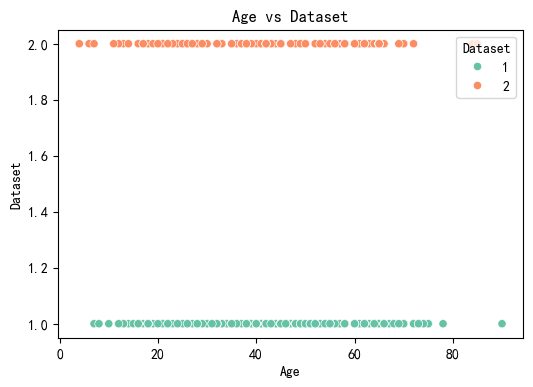

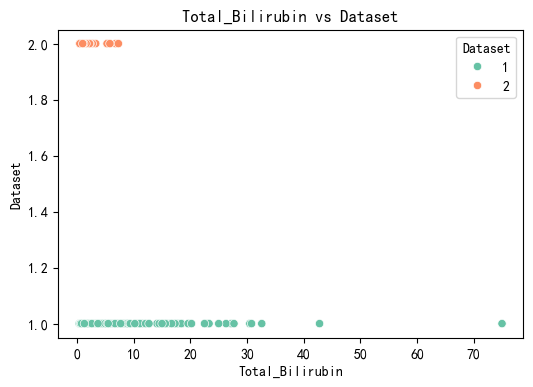

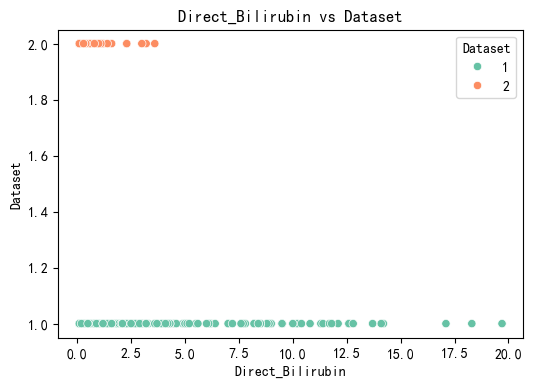

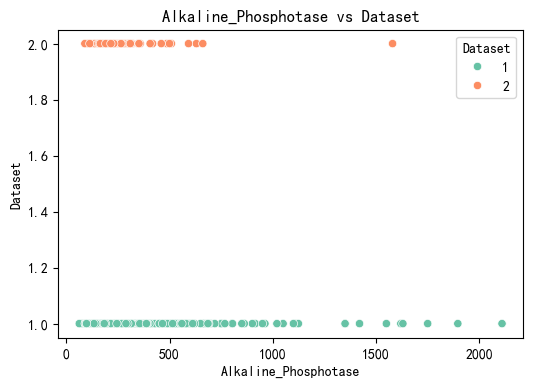

In [50]:
#基于特征重要性得分，我们可以挑选排名靠前的几个特征，
#然后绘制它们与目标变量之间的关系图，比如散点图或者箱线图，来直观理解这些特征如何影响患肝病的概率。
top_features_to_analyze = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase']
for feature in top_features_to_analyze:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Dataset'], hue=df['Dataset'], palette="Set2")
    plt.title(f"{feature} vs Dataset")
    plt.legend(title='Dataset', loc='upper right')
    plt.show()